In [1]:
#Importing the various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from internet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [9]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("/Users/Aman/Downloads/20_newsgroups"): 
    if category == '.DS_Store' :
        continue
    for document in os.listdir("/Users/Aman/Downloads/20_newsgroups/"+category):
        with open("/Users/Aman/Downloads/20_newsgroups/"+category+'/'+document, "r",encoding="ISO-8859-1") as f:
            X.append((document,f.read()))
            Y.append(category)

In [10]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('75895', 'Newsgroups: talk.politics.mideast\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!cs.utexas.edu!uunet!brunix!doorknob!hm\nFrom: hm@cs.brown.edu (Harry Mamaysky)\nSubject: Heil Hernlem \nIn-Reply-To: hernlem@chess.ncsu.edu\'s message of Wed, 14 Apr 1993 12:58:13 GMT\nMessage-ID: <HM.93Apr15112701@yoda.cs.brown.edu>\nSender: news@cs.brown.edu\nOrganization: Dept. of Computer Science, Brown University\nReferences: <1993Apr14.125813.21737@ncsu.edu>\nDate: Thu, 15 Apr 1993 16:27:01 GMT\nLines: 24\n\nIn article <1993Apr14.125813.21737@ncsu.edu> hernlem@chess.ncsu.edu (Brad Hernlem) writes:\n\n   Lebanese resistance forces detonated a bomb under an Israeli occupation\n   patrol in Lebanese territory two days ago. Three soldiers were killed and\n   two wounded. In "retaliation", Israeli and Israeli-backed forces wounded\

In [11]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [12]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [14]:
#Demonstrating re.split
sample_text="Hey! I am Aman. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Aman', 'What', 'are', 'you', 'doing', 'there', '']


In [15]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'xref': 4510,
 'cantaloupe': 19502,
 'srv': 24272,
 'cmu': 39231,
 'edu': 122344,
 'rec': 4918,
 'audio': 362,
 'car': 1780,
 'misc': 8865,
 'forsale': 2158,
 'path': 15285,
 'rochester': 3609,
 'udel': 3251,
 'gatech': 3280,
 'howland': 8228,
 'reston': 8196,
 'ans': 8303,
 'net': 19058,
 'noc': 4624,
 'near': 5124,
 'bigboote': 96,
 'wpi': 305,
 'bigwpi': 43,
 'coates': 8,
 'jeffery': 10,
 'david': 2230,
 'newsgroups': 15274,
 'subject': 16170,
 'sony': 191,
 'amplifier': 52,
 'crossover': 7,
 'sale': 1028,
 'date': 15588,
 'apr': 15384,
 'gmt': 13378,
 'organization': 14897,
 'worcester': 39,
 'polytechnic': 89,
 'institute': 1011,
 'lines': 15693,
 'message': 16463,
 'nntp': 7002,
 'posting': 7327,
 'host': 6719,
 'stereo': 153,
 'model': 629,
 'rated': 77,
 'power': 1918,
 'ohms': 29,
 'thd': 11,
 'ohm': 28,
 'stable': 118,
 'short': 652,
 'circuit': 255,
 'overload': 18,
 'protected': 177,
 'great': 1690,
 'little': 1881,
 'picked': 146,
 'demo': 118,
 'lechmere': 2,
 'last': 23

In [16]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122344),
 ('cmu', 39231),
 ('com', 37526),
 ('news', 25717),
 ('not', 25107),
 ('srv', 24272),
 ('cantaloupe', 19502),
 ('net', 19058),
 ('message', 16463),
 ('subject', 16170),
 ('lines', 15693),
 ('date', 15588),
 ('apr', 15384),
 ('path', 15285),
 ('newsgroups', 15274),
 ('can', 14972),
 ('organization', 14897),
 ('state', 14218),
 ('gmt', 13378),
 ('ohio', 11979),
 ('one', 11830),
 ('will', 11407),
 ('writes', 11027),
 ('article', 10113),
 ('references', 9751),
 ('comp', 9597),
 ('talk', 9227),
 ('misc', 8865),
 ('ans', 8303),
 ('sender', 8275),
 ('howland', 8228),
 ('reston', 8196),
 ('don', 7952),
 ('like', 7748),
 ('people', 7701),
 ('just', 7514),
 ('university', 7462),
 ('posting', 7327),
 ('nntp', 7002),
 ('mps', 6910),
 ('know', 6825),
 ('host', 6719),
 ('sci', 6567),
 ('get', 6432),
 ('think', 6247),
 ('usenet', 6235),
 ('zaphod', 6229),
 ('may', 6115),
 ('politics', 5984),
 ('alt', 5901),
 ('windows', 5676),
 ('also', 5626),
 ('time', 5323),
 ('use', 5237),
 ('har

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

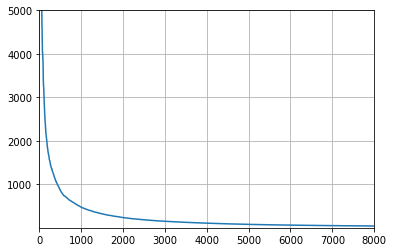

In [19]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [20]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'path',
 'newsgroups',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'think',
 'usenet',
 'zaphod',
 'may',
 'politics',
 'alt',
 'windows',
 'also',
 'time',
 'use',
 'harvard',
 'rutgers',
 'near',
 'eng',
 'new',
 'rec',
 'good',
 'well',
 'crabapple',
 'sei',
 'noc',
 'system',
 'das',
 'xref',
 'soc',
 'cis',
 'now',
 'even',
 'see',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'ece',
 'religion',
 'god',
 'org',
 'way',
 'two',
 'gov',
 'much',
 'many',
 'first',
 'make',
 'say',
 'christian',
 'right',
 'max',
 'rochester',
 'distribution',
 'club',
 'space',
 'want',
 'mail',
 'andrew',
 'gatech',
 'anyone',
 'magnes

In [21]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [22]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [23]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 8  2  0 ...  0  0  0]
 [ 3  2  5 ...  0  0  0]
 [ 3  2  4 ...  0  0  0]
 ...
 [16  4  5 ...  0  0  0]
 [ 6  1  0 ...  0  0  0]
 [ 9  2  0 ...  0  0  0]]
--------------------------
[[5 3 4 ... 0 0 0]
 [4 1 0 ... 0 0 0]
 [8 1 5 ... 0 0 0]
 ...
 [4 2 5 ... 0 0 0]
 [3 1 9 ... 0 0 0]
 [6 5 1 ... 0 0 0]]


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.8875775155031006
Score on testing data: 0.8622
[[227   0   0   0   1   0   0   1   3   0   0   1   0   0   0   1   0   1
    0  34]
 [  0 179  11  11  15   9  12   2   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   4 217  12   7  10   5   0   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   3   6 216  37   1   4   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   3   1  16 220   0   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  11  23   4   4 174   4   0   1   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   1   2   0 223   4   0   0   1   1   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   6 222  11   1   0   0   5   0   1   0   0   0
    2   0]
 [  0   0   0   0   0   0   6   4 212   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   2   3 231  16   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   5   6 230   0   0   1   0   0   0   0
   

# Self Implementation of Naive Bayes

In [26]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [27]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [28]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [29]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [30]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [31]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [32]:
dictionary

{'total_doc': 14997,
 'rec.autos': {'edu': 5946,
  'cmu': 1787,
  'com': 2331,
  'news': 1341,
  'not': 870,
  'srv': 1071,
  'cantaloupe': 883,
  'net': 858,
  'message': 785,
  'subject': 782,
  'lines': 767,
  'date': 768,
  'apr': 783,
  'path': 763,
  'newsgroups': 772,
  'can': 618,
  'organization': 750,
  'state': 832,
  'gmt': 710,
  'ohio': 747,
  'one': 449,
  'will': 445,
  'writes': 620,
  'article': 619,
  'references': 556,
  'comp': 5,
  'talk': 12,
  'misc': 73,
  'ans': 391,
  'sender': 384,
  'howland': 382,
  'reston': 382,
  'don': 380,
  'like': 426,
  'people': 193,
  'just': 421,
  'university': 337,
  'posting': 403,
  'nntp': 377,
  'mps': 387,
  'know': 300,
  'host': 357,
  'sci': 20,
  'get': 373,
  'think': 286,
  'usenet': 403,
  'zaphod': 360,
  'may': 184,
  'politics': 2,
  'alt': 77,
  'windows': 31,
  'also': 312,
  'time': 233,
  'use': 151,
  'harvard': 248,
  'rutgers': 15,
  'near': 255,
  'eng': 190,
  'new': 296,
  'rec': 1321,
  'good': 313,
 

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [34]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8748
[[232   1   0   0   0   0   0   1   2   0   0   1   1   0   1   1   0   2
    1  26]
 [  0 181  14   9  11   8  13   0   0   0   0   0   3   4   0   0   0   0
    0   0]
 [  0  13 191  25   6  16   4   0   0   0   0   0   1   0   0   0   0   0
    1   0]
 [  0   3   1 235  27   1   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   3   1   7 229   2   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  11  21   2   5 179   3   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   3   2   0 221   3   0   0   0   0   4   1   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   6 224   8   0   0   0   9   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   3   3 216   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0 237  15   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   4   1 236   0   0   1   0   0   0   0
    0   0]
 [  0   2   0   0   0   1   1   0  

# Result
We have performed Text classification both by sklearn and self implementation.
We found out that sklearn gave score of 0.8602 on testing data whereas self implemented classifier gave 0.876 on testing data which is quite close.